<a href="https://colab.research.google.com/github/Sravani-05/Assignment04/blob/main/Regularization_and_Early_Stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Regularization***

In [17]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


**Vanishing/Exploding Gradients problem**

In [18]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Saving figure sigmoid_saturation_plot


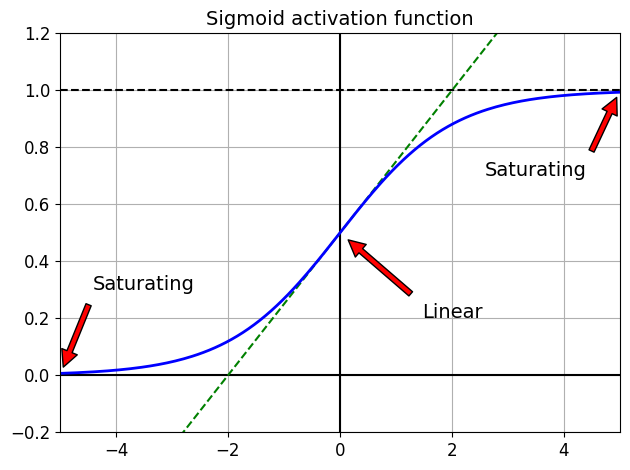

In [19]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='red', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

In [20]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [21]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)
     

**Xavier and He Initialization**

In [22]:
dense = tf.keras.layers.Dense(50, activation="relu",
                              kernel_initializer="he_normal")

In [23]:

he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg",
                                                    distribution="uniform")
dense = tf.keras.layers.Dense(50, activation="sigmoid",
                              kernel_initializer=he_avg_init)

In [24]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


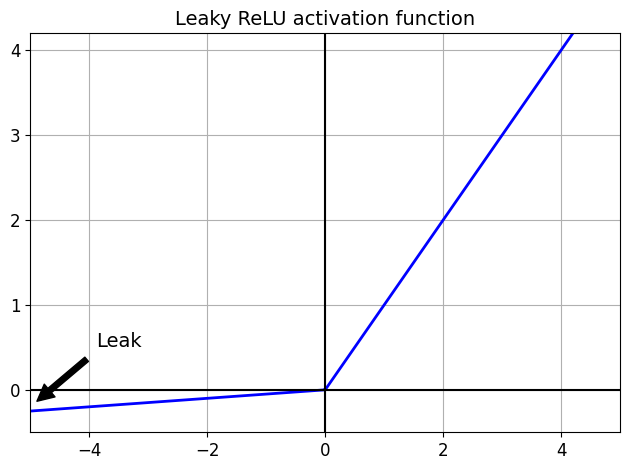

In [25]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [26]:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [27]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [29]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 1.2417 - accuracy: 0.6081 - val_loss: 0.8635 - val_accuracy: 0.7198
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7838 - accuracy: 0.7474 - val_loss: 0.7015 - val_accuracy: 0.7712
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6751 - accuracy: 0.7815 - val_loss: 0.6360 - val_accuracy: 0.7922
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6170 - accuracy: 0.7984 - val_loss: 0.5837 - val_accuracy: 0.8078
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5794 - accuracy: 0.8079 - val_loss: 0.5526 - val_accuracy: 0.8178
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5524 - accuracy: 0.8152 - val_loss: 0.5305 - val_accuracy: 0.8246
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5321 - accuracy: 0.8202 - val_loss: 0.5119 - val_accuracy

In [30]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [33]:

dense = tf.keras.layers.Dense(50, activation="elu",
                              kernel_initializer="he_normal")

In [34]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [35]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

In [36]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


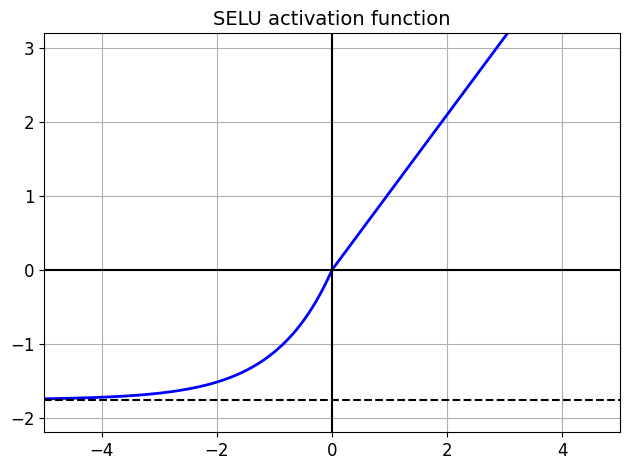

In [37]:

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

Saving figure elu_selu_plot


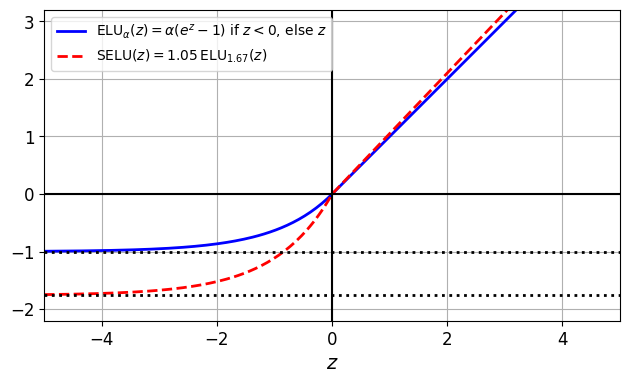

In [38]:
z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

save_fig("elu_selu_plot")
plt.show()

In [39]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


Using Selu on Fashion MNISt data

In [40]:
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))
     

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

**Train model. Scale data with mean 0 and standard deviation 1**

In [43]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [44]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 51s 25ms/step - loss: 1.2661 - accuracy: 0.5267 - val_loss: 1.2876 - val_accuracy: 0.5290
Epoch 2/5
1719/1719 [==============================] - 40s 23ms/step - loss: 0.8394 - accuracy: 0.6890 - val_loss: 0.6600 - val_accuracy: 0.7618
Epoch 3/5
1719/1719 [==============================] - 41s 24ms/step - loss: 0.6639 - accuracy: 0.7565 - val_loss: 0.6700 - val_accuracy: 0.7440
Epoch 4/5
1719/1719 [==============================] - 41s 24ms/step - loss: 0.6098 - accuracy: 0.7786 - val_loss: 0.5498 - val_accuracy: 0.8092
Epoch 5/5
1719/1719 [==============================] - 40s 23ms/step - loss: 0.5691 - accuracy: 0.7977 - val_loss: 0.5140 - val_accuracy: 0.8228


**Batch Normalization**

In [45]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_122 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_123 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [46]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [48]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [49]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.8651 - accuracy: 0.7093 - val_loss: 0.5678 - val_accuracy: 0.8108
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5849 - accuracy: 0.7971 - val_loss: 0.4831 - val_accuracy: 0.8348
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.5272 - accuracy: 0.8146 - val_loss: 0.4453 - val_accuracy: 0.8484
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4869 - accuracy: 0.8289 - val_loss: 0.4206 - val_accuracy: 0.8556
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4606 - accuracy: 0.8392 - val_loss: 0.4054 - val_accuracy: 0.8616
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4439 - accuracy: 0.8423 - val_loss: 0.3924 - val_accuracy: 0.8644
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4296 - accuracy: 0.8483 - val_loss: 0.3830 - val_ac

**Optimizers**

In [51]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [52]:

optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [53]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)


In [54]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [55]:

optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

Learning Rate Scheduling

In [56]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

In [57]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [58]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 10s 5ms/step - loss: 0.4901 - accuracy: 0.8293 - val_loss: 0.4034 - val_accuracy: 0.8636
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3806 - accuracy: 0.8662 - val_loss: 0.3725 - val_accuracy: 0.8732
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3475 - accuracy: 0.8770 - val_loss: 0.3757 - val_accuracy: 0.8670
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3258 - accuracy: 0.8838 - val_loss: 0.3500 - val_accuracy: 0.8742
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3105 - accuracy: 0.8903 - val_loss: 0.3425 - val_accuracy: 0.8756
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2969 - accuracy: 0.8945 - val_loss: 0.3419 - val_accuracy: 0.8798
Epoch 7/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2868 - accuracy: 0.8983 - val_loss: 0.3360 - val_accuracy

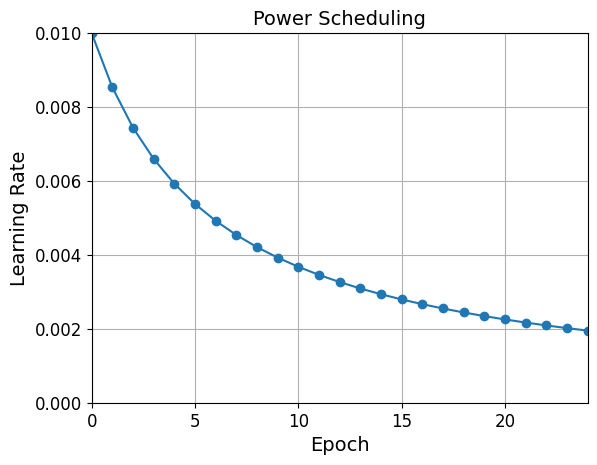

In [59]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

**Exponential Scheduling**

In [60]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [61]:

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [62]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [64]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 13s 8ms/step - loss: 2.1454 - accuracy: 0.2408 - val_loss: 2.4498 - val_accuracy: 0.2636 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 14s 8ms/step - loss: 1.9798 - accuracy: 0.2857 - val_loss: 1.8400 - val_accuracy: 0.3018 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 14s 8ms/step - loss: 1.6118 - accuracy: 0.3824 - val_loss: 1.5256 - val_accuracy: 0.3722 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 14s 8ms/step - loss: 1.4444 - accuracy: 0.4324 - val_loss: 1.3381 - val_accuracy: 0.4384 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 14s 8ms/step - loss: 1.1875 - accuracy: 0.5153 - val_loss: 1.1278 - val_accuracy: 0.5814 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 14s 8ms/step - loss: 1.0380 - accuracy: 0.5783 - val_loss: 1.0823 - val_accuracy: 0.5632 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================

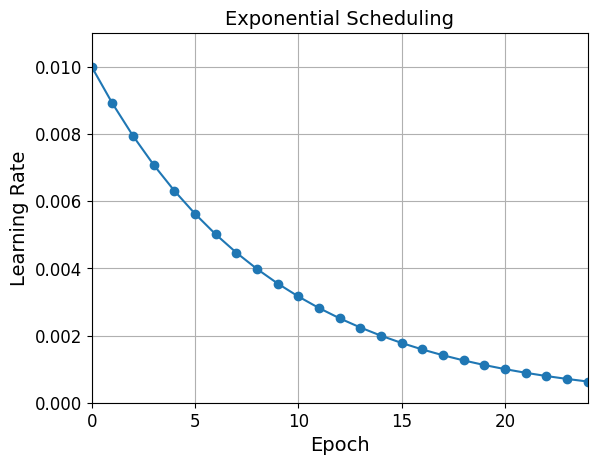

In [65]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [66]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [67]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [68]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 15s 8ms/step - loss: 0.7448 - accuracy: 0.7814 - val_loss: 0.7824 - val_accuracy: 0.7990 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7625 - accuracy: 0.7754 - val_loss: 0.7027 - val_accuracy: 0.7994 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8939 - accuracy: 0.7290 - val_loss: 1.2724 - val_accuracy: 0.5964 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 14s 8ms/step - loss: 1.0077 - accuracy: 0.6723 - val_loss: 0.9037 - val_accuracy: 0.6790 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 14s 8ms/step - loss: 1.0280 - accuracy: 0.6588 - val_loss: 1.1826 - val_accuracy: 0.6580 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8000 - accuracy: 0.7191 - val_loss: 0.7657 - val_accuracy: 0.7528 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================

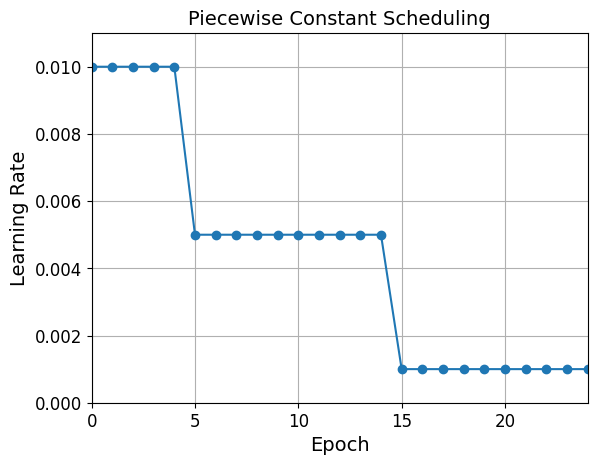

In [69]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

**Performance scheduling**

In [70]:
tf.random.set_seed(42)
np.random.seed(42)
     

In [71]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5952 - accuracy: 0.8053 - val_loss: 0.4662 - val_accuracy: 0.8502 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4902 - accuracy: 0.8405 - val_loss: 0.6335 - val_accuracy: 0.8232 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5150 - accuracy: 0.8417 - val_loss: 0.5562 - val_accuracy: 0.8526 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5258 - accuracy: 0.8437 - val_loss: 0.5067 - val_accuracy: 0.8404 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5168 - accuracy: 0.8504 - val_loss: 0.4861 - val_accuracy: 0.8398 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5053 - accuracy: 0.8553 - val_loss: 0.6446 - val_accuracy: 0.8456 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================]

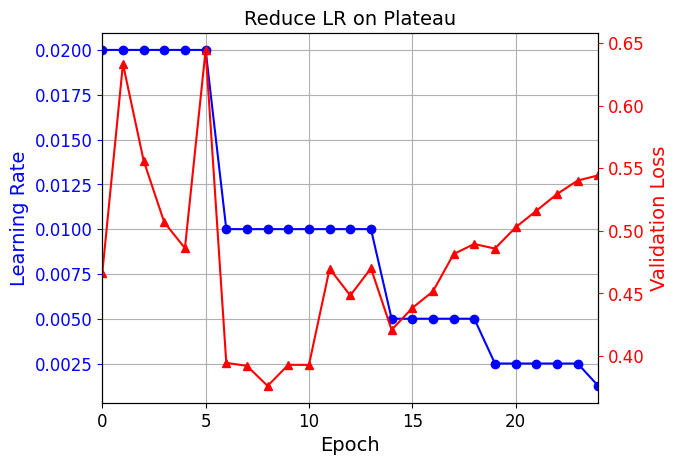

In [72]:

plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

Kera Schedulers

In [73]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4842 - accuracy: 0.8314 - val_loss: 0.4015 - val_accuracy: 0.8630
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3774 - accuracy: 0.8666 - val_loss: 0.3689 - val_accuracy: 0.8704
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3442 - accuracy: 0.8784 - val_loss: 0.3632 - val_accuracy: 0.8730
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3230 - accuracy: 0.8842 - val_loss: 0.3421 - val_accuracy: 0.8820
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3072 - accuracy: 0.8909 - val_loss: 0.3352 - val_accuracy: 0.8808
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2936 - accuracy: 0.8963 - val_loss: 0.3329 - val_accuracy: 0.8852
Epoch 7/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2833 - accuracy: 0.8990 - val_loss: 0.3304 - val_accur

In [74]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

**l1 and l2 regularization**

In [75]:
layer = keras.layers.Dense(100, activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [76]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="relu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 16s 9ms/step - loss: 1.5027 - accuracy: 0.8190 - val_loss: 0.7119 - val_accuracy: 0.8476
Epoch 2/2
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7276 - accuracy: 0.8310 - val_loss: 0.7069 - val_accuracy: 0.8372


In [77]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 16s 8ms/step - loss: 1.6592 - accuracy: 0.8133 - val_loss: 0.7093 - val_accuracy: 0.8374
Epoch 2/2
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7213 - accuracy: 0.8271 - val_loss: 0.6955 - val_accuracy: 0.8326


**DROPOUT**

In [78]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 17s 9ms/step - loss: 0.5722 - accuracy: 0.8021 - val_loss: 0.3578 - val_accuracy: 0.8716
Epoch 2/2
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4221 - accuracy: 0.8445 - val_loss: 0.3531 - val_accuracy: 0.8692


**Alpha Dropout**

In [79]:
tf.random.set_seed(42)
np.random.seed(42)
     

In [80]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 14s 7ms/step - loss: 0.6661 - accuracy: 0.7598 - val_loss: 0.5751 - val_accuracy: 0.8410
Epoch 2/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5571 - accuracy: 0.7949 - val_loss: 0.5610 - val_accuracy: 0.8440
Epoch 3/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5296 - accuracy: 0.8050 - val_loss: 0.4946 - val_accuracy: 0.8524
Epoch 4/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5061 - accuracy: 0.8117 - val_loss: 0.4805 - val_accuracy: 0.8604
Epoch 5/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4954 - accuracy: 0.8167 - val_loss: 0.4698 - val_accuracy: 0.8582
Epoch 6/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4846 - accuracy: 0.8212 - val_loss: 0.4686 - val_accuracy: 0.8626
Epoch 7/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4709 - accuracy: 0.8263 - val_loss: 0.4892 - val_ac

**MonteCarlo Dropout**

In [81]:
tf.random.set_seed(42)
np.random.seed(42)

In [82]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)


In [83]:
np.round(model.predict(X_test_scaled[:1]), 2)
np.round(y_probas[:, :1], 2)
np.round(y_proba[:1], 2)

1/1 [==============================] - 0s 169ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.31, 0.  , 0.64]],
      dtype=float32)

In [84]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.28, 0.  , 0.29]],
      dtype=float32)

In [85]:
y_pred = np.argmax(y_proba, axis=1)

In [87]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.861

In [88]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [89]:
tf.random.set_seed(42)
np.random.seed(42)
     

In [90]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])
mc_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaDr  (None, 784)              0         
 opout)                                                          
                                                                 
 dense_150 (Dense)           (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_151 (Dense)           (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlpha  (None, 100)            

In [91]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [92]:

mc_model.set_weights(model.get_weights())
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

1/1 [==============================] - 0s 25ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.31, 0.  , 0.63]],
      dtype=float32)

Max Norm

In [93]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [94]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 17s 9ms/step - loss: 0.4711 - accuracy: 0.8336 - val_loss: 0.3660 - val_accuracy: 0.8668
Epoch 2/2
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3565 - accuracy: 0.8696 - val_loss: 0.3849 - val_accuracy: 0.8638


**Early Stopping**

In [95]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [96]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [97]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [98]:
# Creating X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X) 
y= df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

In [101]:
model = create_model()

In [102]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [103]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 2s - loss: 1.0830 - accuracy: 0.4111 - val_loss: 1.0366 - val_accuracy: 0.6000 - 2s/epoch - 639ms/step
Epoch 2/200
3/3 - 0s - loss: 1.0101 - accuracy: 0.7000 - val_loss: 0.9759 - val_accuracy: 0.6000 - 56ms/epoch - 19ms/step
Epoch 3/200
3/3 - 0s - loss: 0.9209 - accuracy: 0.7778 - val_loss: 0.8662 - val_accuracy: 0.9667 - 56ms/epoch - 19ms/step
Epoch 4/200
3/3 - 0s - loss: 0.8149 - accuracy: 0.9333 - val_loss: 0.7520 - val_accuracy: 0.9333 - 46ms/epoch - 15ms/step
Epoch 5/200
3/3 - 0s - loss: 0.6774 - accuracy: 0.8778 - val_loss: 0.5859 - val_accuracy: 0.9333 - 69ms/epoch - 23ms/step
Epoch 6/200
3/3 - 0s - loss: 0.5271 - accuracy: 0.8889 - val_loss: 0.4595 - val_accuracy: 1.0000 - 66ms/epoch - 22ms/step
Epoch 7/200
3/3 - 0s - loss: 0.4024 - accuracy: 0.9444 - val_loss: 0.3334 - val_accuracy: 0.9667 - 69ms/epoch - 23ms/step
Epoch 8/200
3/3 - 0s - loss: 0.3156 - accuracy: 0.9111 - val_loss: 0.2339 - val_accuracy: 1.0000 - 65ms/epoch - 22ms/step
Epoch 9/200
3/3 - 0s - lo

In [104]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

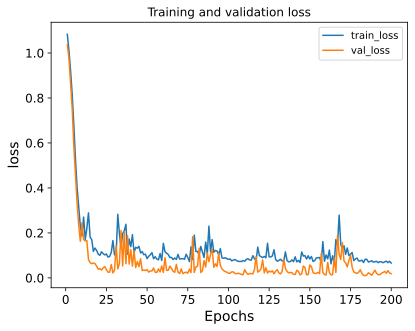

In [105]:
plot_metric(history, 'loss')

In [106]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

In [107]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.0697 - accuracy: 0.9778 - val_loss: 0.0202 - val_accuracy: 1.0000 - 113ms/epoch - 38ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0683 - accuracy: 0.9778 - val_loss: 0.0345 - val_accuracy: 1.0000 - 69ms/epoch - 23ms/step


In [108]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

In [109]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[custom_early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.0742 - accuracy: 0.9556 - val_loss: 0.0228 - val_accuracy: 1.0000 - 90ms/epoch - 30ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0666 - accuracy: 0.9778 - val_loss: 0.0270 - val_accuracy: 1.0000 - 62ms/epoch - 21ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0691 - accuracy: 0.9778 - val_loss: 0.0223 - val_accuracy: 1.0000 - 70ms/epoch - 23ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0691 - accuracy: 0.9778 - val_loss: 0.0308 - val_accuracy: 1.0000 - 51ms/epoch - 17ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0682 - accuracy: 0.9778 - val_loss: 0.0260 - val_accuracy: 1.0000 - 49ms/epoch - 16ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0664 - accuracy: 0.9778 - val_loss: 0.0169 - val_accuracy: 1.0000 - 43ms/epoch - 14ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0672 - accuracy: 0.9778 - val_loss: 0.0184 - val_accuracy: 1.0000 - 48ms/epoch - 16ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0708 - accuracy: 0.9667 - val_loss: 0.0200 - val_accuracy: 1.0000 - 63ms/epoch - 21ms/step
Epoch 9/200
3/3 - 0s - l

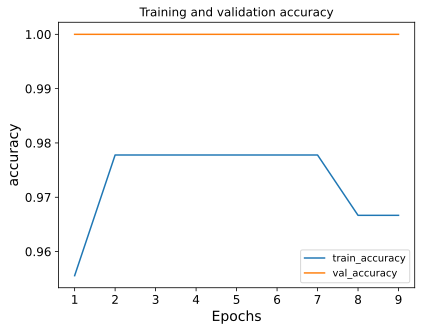

In [110]:
plot_metric(history, 'accuracy')